# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [6]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

The Smartcab does not move at all during the simulation whether or not the light is red. It does not update its status, so it appears that the simulation does not affects its disposition.The driving agent is receiving positive rewards at the beginning when the Smartcab is stopped at a red light. Later, when the red light is changed to green light and there are no oncoming traffic, the reward soon becomes negative, however, the agent still remains where it is, idle at the current intersection. The cab is basically receiving awards based on its following of the traffic laws, but it is not moving at all, so it is not receiving a reward for when the light is green.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In the *`agent.py`* Python file, there are the following flags:

- learning: indicates whether the cab is in the learning mode or not. If it's in the learning mode, its actions will influence its decision making proccess in the next rounds.
- num_dummies – discrete number of dummy agents in the environment: The number of dummy agents will affect the performance of our agent. Since we have to wait for other cars who has higher priority, more dummy agents will delay our agent in the intersection. Also we may have higher chance to have accident in the intersection, then the safety will be affected.
- display: This flag enables the visual simulation that PyGame GUI provides if set to True, but is not expected to change the simulation outcome except not display the GUI. The default value of this flag is set to True. This may save time when we are running large numbers of Monte Carlo runs and trying to find the optimal parameters such as epsilon and alphs.

In the *`environments.py`* Python file, the act() function is called when an agent performs an action. This functions enables the agent to act in the environment and receive the reward of his action.

In the *`simulator.py`*, Python file, the 'render_text()' function display the current state in a textual format. The 'render()' function displays this in a nice Graphical User Interface (GUI) using the Python PyGame module. 
Both are needed, in my opinion, since the GUI's simulation display will not have historical information, but we can scroll back in the textural render to find historical information.


In the *`planner.py`* Python file, the next_waypoint() function will consider the East-West direction first and then North-South direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


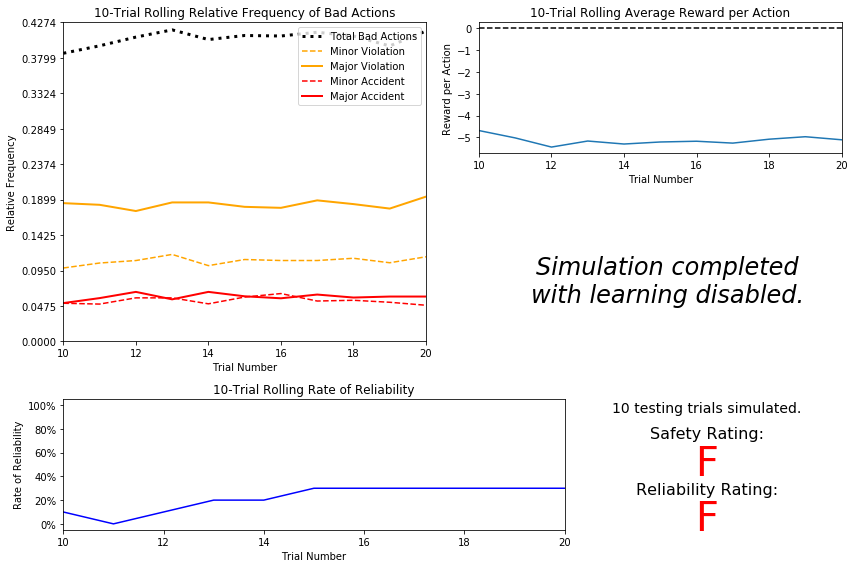

In [16]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- The driving agent is making bad decisions somewhere between about 38% and 42% of the time. These bad decisions lead to a decent amount of accidents, with minor accidents occurring around 5% of the time, and major accidents between roughly 4.8% and 6% of the time. 

- Given that the agent is driving randomly and is not learning, this result does make sense. This shouldn't be a surprise since it's choosing its actions randomly and with no consideration with where it should go or what the traffic conditions are like.

- The rewards received on average are between -4 and -6, showing it is getting heavily penalized. And it did not improve with time, showing that random choice is by no means a 'self-learning' algorithm.

- As the number of trials increases, the accident frequence does not imporve significantly. The reliablility rate does not change overall and stays a constant around 30%. This could be because our agent is still making decisions randomly and not learning from it's mistakes.

- As it is right now, the Smartcab would not be considered safe and it should not be allowed to actually be on the road. This Smartcab is both unsafe and unreliable (getting F's in both). To be safe, we would want very few accidents or violations, and to be reliable it would need to arrive on time much closer to 100% of the time.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The four features as below ('waypoint', 'oncoming', 'left', and 'light' ) are most relevant for learning both safety and efficiency:

- The 'waypoint' helps leads the Smartcab to the destination in the correct derection through the most optimal way, improving the efficiency.

- The 'oncoming' and 'left' features contain the intended directions of travel of other cars near the Smartcab in the environment. The Smartcab must know if there is a vehicle coming in the opposite direction when it is trying to make a left turn, so as to not go into a road with oncoming traffic when deciding to turn left. If the agent decides to drive into oncoming traffic, then it will cause either a minor traffic violation or, if there is a vehicle present, a major accident.

- The 'light' is the key feature that Smartcab must to know as to learn it will be penalized for being in idle state when the light is green, or going through intersections with red traffic lights which will cause traffic violations and even accidents.


The two feature ('Right' and 'deadline') I would not consider as relivent for the following reasons:

- The 'right' we don't need to care about, as they won't shouldn't forward on a red light, assuming they follow traffic rules, though we do need to check out for cars on the left before taking a right turn at a traffic light.

- The 'deadline' seems important; however, the Smartcab may start to learn to be more dangerous in order to meet its deadline, and we don't want that. Setting it this way may help improve on its reliability by causing minor safety violations to major accidents. This is something to avoid, but I think we want the agent to learn it on its own.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

Given that I am using four features, the states are summary as below:

| Feature | Number of states | States |
| :---: | :---: | :---: |
| waypoint | 3 | forward, left, right |
| inputs: oncoming | 4 | None, forward, left, right |
| inputs: left | 4 | None, forward, left, right |
| inputs: light | 2 | red, green |

The number of combinations here will, thus, be 3x4x4x2 = 96. It is not a large number. I think it is a reasonable number of policies for the agent to learn within a reasonable number of training trials.

In a few hundred trials, our agent should be able to see each state at-least once.
So the driving agent could learn a policy for each possible state within a reasonable number of training trials.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

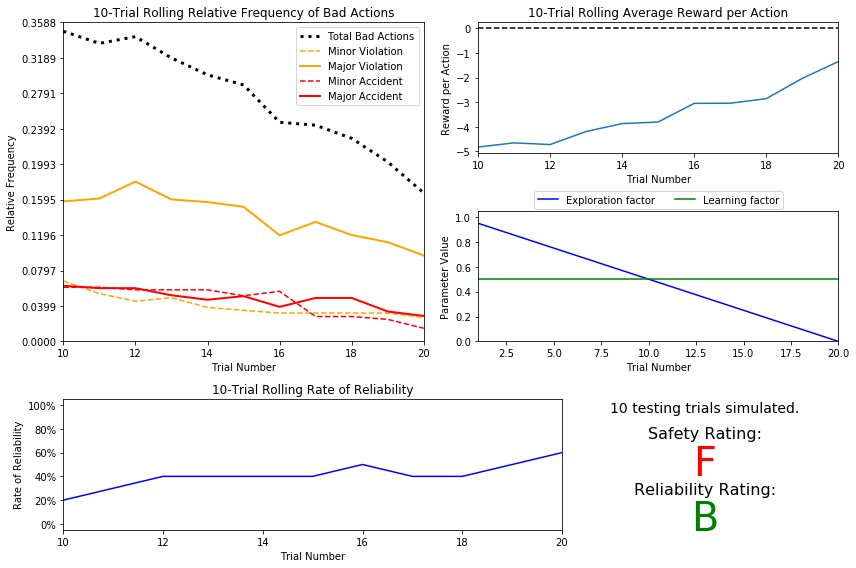

In [25]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- Frequency of total bad actions has dropped down to around 18% from 35% of an agent with no learning, and it keeps going down as the number of training trials increases. We can also see a decrease in the major and minor traffic violations. This agent clearly got better based on above performance.
- The agent required 20 trials before testing, which makes sense given that the epsilon was decreasing by 0.05. So, 1.0 - (20 x 0.05) = 0.0 < 0.05. When epsilon hit zero, it began testing.
- Yes, my decaying function is accurately represented in the parameters panel, as it steadily decreased each trial across the 20 trials.
- As the number of training trails increase, the number of bad action actually decrease from ~35% to under 20%, Similarly, the average reward increased substantially from nearly -5 to around -1.5.
- The safety rating are still F. Even though the new Q-Learning agent performance has improved compare to the basic driving agent, it has not improved enough to earn a better rating for safety. We'll need further improvements to get better ratings. However, reliability is now a B, a complete flip from the F for the initial driving agent.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

decaying functions-1: e=a**t, best parameters: Alpha: 0.5, Tolerance: 0.005


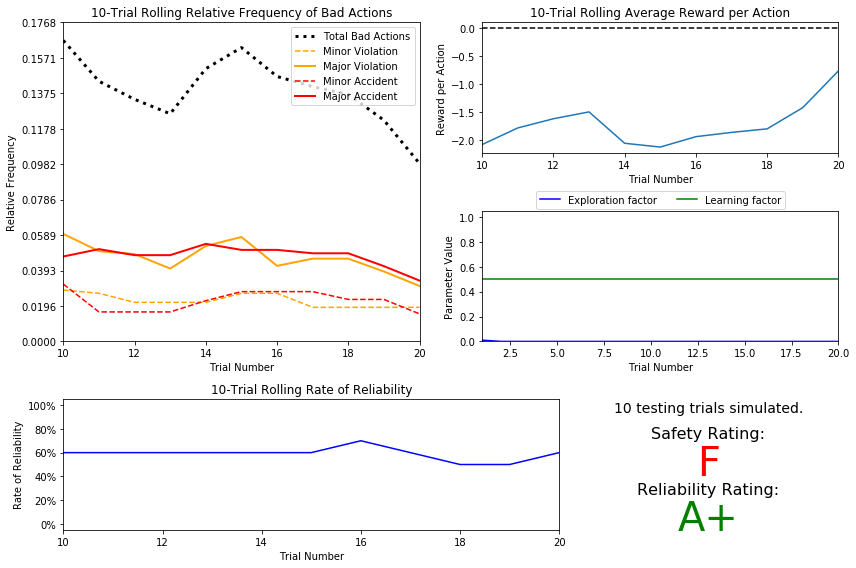

In [103]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("decaying functions-1: e=a**t, best parameters: Alpha: 0.5, Tolerance: 0.005")
vs.plot_trials('sim_improved-learning.csv')

decaying functions-2: e=1/(t**2), best parameters: Alpha: 0.5, Tolerance: 0.0005


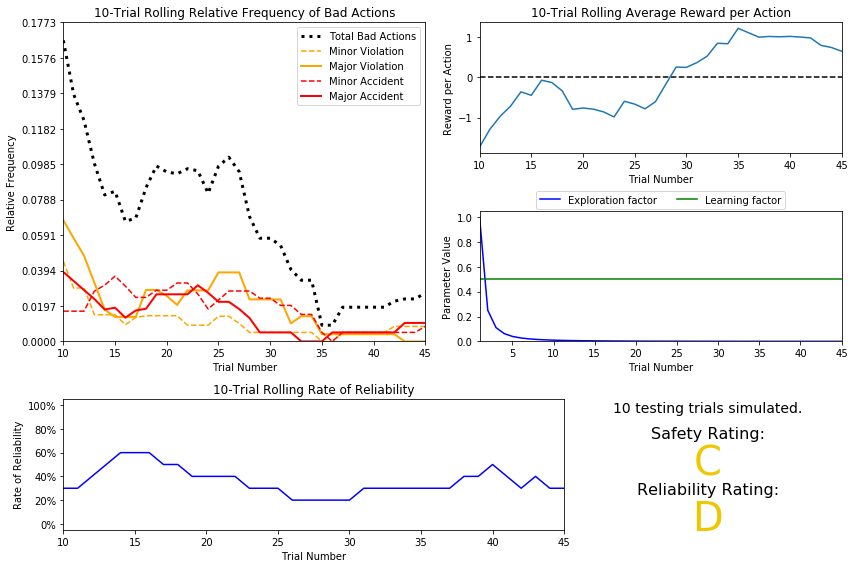

In [110]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("decaying functions-2: e=1/(t**2), best parameters: Alpha: 0.5, Tolerance: 0.0005")
vs.plot_trials('sim_improved-learning.csv')

decaying functions-3: e=ABS(cos(a*t/t**2), best parameters: Alpha: 0.5, Tolerance: 0.0005


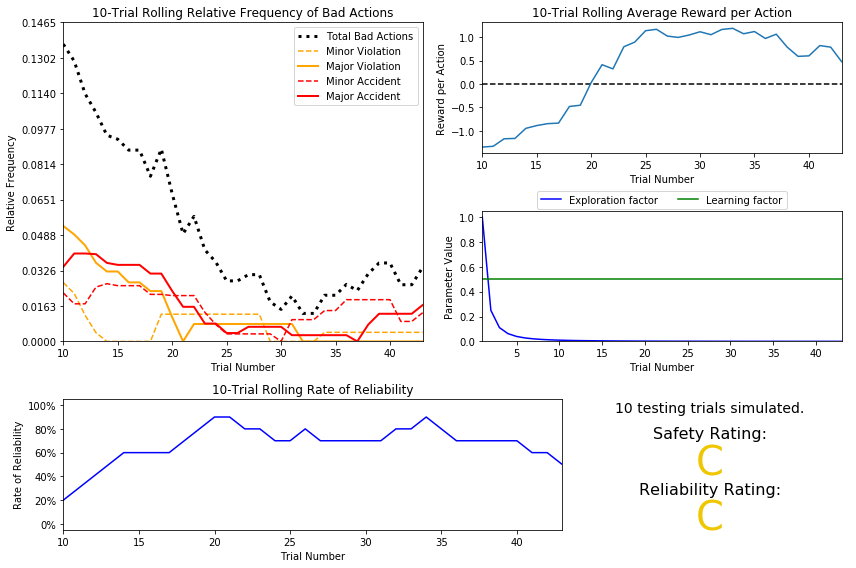

In [128]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("decaying functions-3: e=ABS(cos(a*t/t**2), best parameters: Alpha: 0.5, Tolerance: 0.0005")
vs.plot_trials('sim_improved-learning.csv')

decaying functions-3: e=np.exp(-0.01*self.t), best parameters: Alpha: 0.5, Tolerance: 0.005


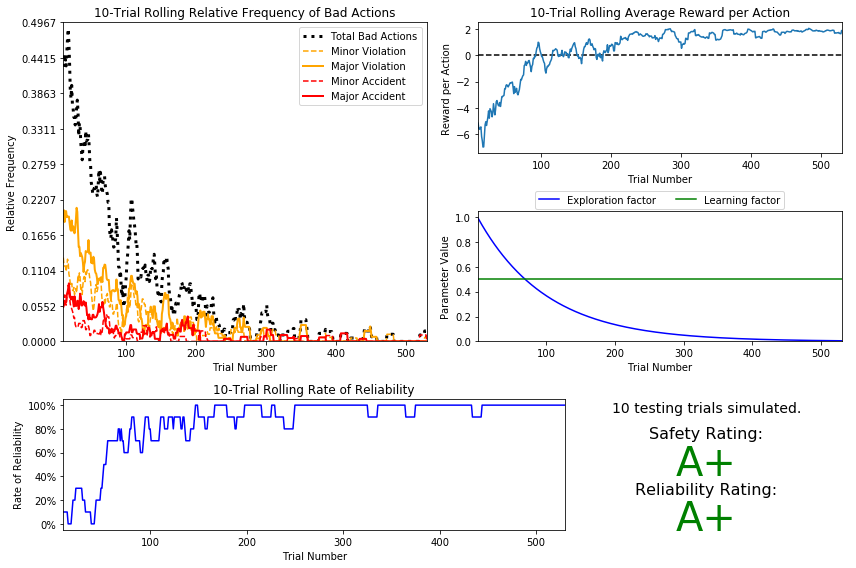

In [137]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
print("decaying functions-3: e=np.exp(-0.01*self.t), best parameters: Alpha: 0.5, Tolerance: 0.005")
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

There are 3 factor in my experiment factorial design of final Q-Learning Simulation results: **Alpha: 0.5/0.2/0.1**, **Tolerance: 0.05/0.005/0.0005**, and **4 decaying functions** ($\epsilon = a^t, \epsilon = \frac{1}{t^2}, \epsilon = e^{-at}, \epsilon = \frac{cos(at)}{t^2}$). I made 36 attempts **(3X3X4=36)** before deriving the final optimized Q-Learning agent with differnt epsilons, alpha and tolerance values, including these combinations (some of their outcomes in the below table and in the charts are displayed above).
I settle on using the $\epsilon = e^{-at}$ as the final exploration factor with alpha 0.5 and tolerance 0.005 (as above decaying functions-4).

All results, bad actions, violations, accidents, rate of reliability, etc. do not behave the same between the basic driving agent, the default and the final optimized Q-Learning agents. Bad actions, violations, accidents all dramatically went down over time for the final optimized Q-Learning agent even when compared to the default Q-Learning agent which was clearly superior to the basic driving agent.

The reliability has gone up (from ~20% to ~100%), and safety is now an A+ after failing before! Total bad actions dropped to around 0.01%, which is much improved from still being around 44% at the end of the default Q-learner's training. It is now consistently getting a positive award by the end of training.

I would definitely say that the results show that the driving agent has learned an appropriate policy - the average reward being positive, along with **double A+**(high reliability and safety), show it has become very effective. I am certainly satisfied with these safety and reliability ratings.


- Decaying functions-1: $ \epsilon = a^t, \textrm{for } a=0.01 $

| Attempt  | Decaying functions | Alpha | Tolerance | Safety | Reliability | n_test |
| :------: | :----------------: | :---: | :-------: | :----: | :---------: | :---: |
| 1 | $\epsilon = a^t$ | 0.5 | 0.05 | F | F | 10 |
| 2 | $\epsilon = a^t$ | 0.5 | 0.005 | **F** | **A+** | 10 |
| 3 | $\epsilon = a^t$ | 0.5 | 0.0005 | F | F | 10 |
| 4 | $\epsilon = a^t$ | 0.2 | 0.05 | F | B | 10 |
| 5 | $\epsilon = a^t$ | 0.2 | 0.005 | F | F | 10 |
| 6 | $\epsilon = a^t$ | 0.2 | 0.0005 | F | F | 10 |
| 7 | $\epsilon = a^t$ | 0.1 | 0.05 | F | F | 10 |
| 8 | $\epsilon = a^t$ | 0.1 | 0.005 | F | F | 10 |
| 9 | $\epsilon = a^t$ | 0.1 | 0.0005 | F | F | 10 |

- Decaying functions-2: $\epsilon = \frac{1}{t^2}\hspace{50px}$

| Attempt  | Decaying functions | Alpha | Tolerance | Safety | Reliability | n_test |
| :------: | :----------------: | :---: | :-------: | :----: | :---------: | :---: |
| 1 | $\epsilon = \frac{1}{t^2}$ | 0.5 | 0.05 | F | F | 10 |
| 2 | $\epsilon = \frac{1}{t^2}$ | 0.5 | 0.005 | F | D | 10 |
| 3 | $\epsilon = \frac{1}{t^2}$ | 0.5 | 0.0005 | **C** | **D** | 10 |
| 4 | $\epsilon = \frac{1}{t^2}$ | 0.2 | 0.05 | F | F | 10 |
| 5 | $\epsilon = \frac{1}{t^2}$ | 0.2 | 0.005 | F | F | 10 |
| 6 | $\epsilon = \frac{1}{t^2}$ | 0.2 | 0.0005 | F | F | 10 |
| 7 | $\epsilon = \frac{1}{t^2}$ | 0.1 | 0.05 | F | F | 10 |
| 8 | $\epsilon = \frac{1}{t^2}$ | 0.1 | 0.005 | F | F | 10 |
| 9 | $\epsilon = \frac{1}{t^2}$ | 0.1 | 0.0005 | F | F | 10 |

- Decaying functions-3: $\epsilon = \frac{cos(at)}{t^2}, \textrm{for } a=0.01 $

| Attempt  | Decaying functions | Alpha | Tolerance | Safety | Reliability | n_test |
| :------: | :----------------: | :---: | :-------: | :----: | :---------: | :---: |
| 1 | $\epsilon = \frac{cos(at)}{t^2}$| 0.5 | 0.05 | D | C | 10 |
| 2 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.5 | 0.005 | F | F | 10 |
| 3 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.5 | 0.0005 | **C** | **C** | 10 |
| 4 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.2 | 0.05 | F | F | 10 |
| 5 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.2 | 0.005 | F | F | 10 |
| 6 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.2 | 0.0005 | F | F | 10 |
| 7 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.1 | 0.05 | F | F | 10 |
| 8 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.1 | 0.005 | F | F | 10 |
| 9 | $\epsilon = \frac{cos(at)}{t^2}$ | 0.1 | 0.0005 | F | F | 10 |

- Decaying functions-4: $\epsilon = e^{-at}, \textrm{for } a=0.01 $

| Attempt  | Decaying functions | Alpha | Tolerance | Safety | Reliability | n_test |
| :------: | :----------------: | :---: | :-------: | :----: | :---------: | :---: |
| 1 | $\epsilon = e^{-at}$ | 0.5 | 0.05 | **A+** | **A+** | 10 |
| 2 | $\epsilon = e^{-at}$ | 0.5 | 0.005 | **A+** | **A+** | 10 |
| 3 | $\epsilon = e^{-at}$ | 0.5 | 0.0005 | **A+** | **A+** | 10 |
| 4 | $\epsilon = e^{-at}$ | 0.2 | 0.05 | A+ | A+ | 10 |
| 5 | $\epsilon = e^{-at}$ | 0.2 | 0.005 | A | A | 10 |
| 6 | $\epsilon = e^{-at}$ | 0.2 | 0.0005 | A+ | A | 10 |
| 7 | $\epsilon = e^{-at}$ | 0.1 | 0.05 | A | A | 10 |
| 8 | $\epsilon = e^{-at}$ | 0.1 | 0.005 | A | A | 10 |
| 9 | $\epsilon = e^{-at}$ | 0.1 | 0.0005 | A | A | 10 |





### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**

Definition of optimal policy: If the light is green and the waypoint is forward, no matter where oncoming traffic to go, the agend can go forward. If the light is green and the waypoint is right, no matter where oncoming traffic to go, the agend can go right, Otherwise, if the waypoint is left and there is no oncoming car, the car can go left. If the light is green and the waypoint is left and there is oncoming car go forward or left, the agend should wait, otherwise, if there is oncoming car go right, the agend can go left with the inside lane (because the oncoming direction is also going left), or go forward and turn left at next intersection.

If the light is red and the waypoing is right without any vehicles on the left, the car should go right on a red light (allowed in U.S.). Otherwise, the car need to wait. Not all the learned policy actions are the correct ones according to our optimal policy definition. The optimal policy would be the following:

| light | waypoint | left traffic | oncoming traffic | Agent Should do |
| :------: | :---: | :--------: | :-------: | :-------------: |
| green | forward | - | forward/right/left | forward |
| green | right | - | forward/right/left | right |
| green | left | - | None | left |
| green | left | - | forward | wait |
| green | left | - | left | wait |
| green | left | - | right | left(with inside lane)/forward |
| red | right | None | - | right |
| red | right | right/left | - | right |
| red | right | forward | - | wait |
| red | forward/left | - | - | wait |


**Correct policy observation:**

In the "sim_improved-learning.txt" policy mostly follows the above optimal policy. For example:
- case1:
('right', 'green', 'forward', 'right')
 -- forward : 0.89
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00
 
When the waypoint is 'right' and the light is 'green' with left car 'forward' and oncoming car 'right', the agend can turns right, which is the optimal action.

- case2:
('forward', 'red', None, None)
 -- forward : -10.15
 -- right : 1.10
 -- None : 2.30
 -- left : -10.06

When the waypoint is ‘forward’ and the light is ‘red’, the driving agent waits without doing anything which is the optimal action. Going forward or turning left will violate the law and cause accident, so the penalty is large(-10.15 and -10.06).


**Incorrect/unexpected policy observation:**

- case1:
('right', 'red', 'forward', None)
 -- forward : -8.92
 -- right : 2.05
 -- None : 0.25
 -- left : -9.77

When the light is red and we need to go right, we should be able to go right, but since the left traffic is going forward (to our right) they have the right of way so we shouldn't go anywhere. But in this case, there is a positive reward associated with going right (2.05) and it is large than 'None' (0.25).

- case2:
('left', 'red', 'right', 'forward')
 -- forward : -19.73
 -- right : 0.12
 -- None : 2.09
 -- left : 0.00

We need to go left and the light is red, so we should stay put, which is what the car would do. But there is a positive reward associated with going right, even though that would make us father away from the target. Perhaps this is because we are still following the traffic laws. However, if we are being efficient, we shouldn't go right.











-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

For the smartcab itself, since each state is local, there is no benefit to 'linking' actions together in this scenario. The objective of smartcab is to learn how to obey traffic rules, and get to the destination. Both of them can be learned from immediate reward, which has nothing to do with the future rewards.

Furthermore, the cab is not aware of the overall environment, but just the intersection it is at. The environment does not expose this (X,Y) coordinate location information to the Smartcab agent. the Smartcab has no knowledge of its (X,Y) location in the grid world, so cannot be bias to move away from that to another (X,Y) location that it also does not know about. It can only go towards its destination based on directions given by its environment alone at its current state.

For the environment, the states at each step are mostly independent. The choice the Smartcab makes at a certain step does not effect the state of the light or traffic on the next step. The ‘waypoint’ is the only feature of the state that may be dependent on the previous action but the disavantages of adding the future reward could negatively affect Q-values!


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.